In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

In [2]:
covid_df=pd.read_csv('data/us_covid19.csv', sep = '\t')

In [3]:
covid_df.head()

,Unnamed: 0,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,0,United States of America,US,Wyoming,Sublette,56035.0,42.77,-109.91,0,0,0,0,2020-01-23T00:00:00Z
1,1,United States of America,US,Wyoming,Sweetwater,56037.0,41.66,-108.88,0,0,0,0,2020-01-23T00:00:00Z
2,2,United States of America,US,Wyoming,Teton,56039.0,43.94,-110.59,0,0,0,0,2020-01-23T00:00:00Z
3,3,United States of America,US,Wyoming,Uinta,56041.0,41.29,-110.55,0,0,0,0,2020-01-23T00:00:00Z
4,4,United States of America,US,Wyoming,Unassigned,90056.0,0.00,0.00,0,0,0,0,2020-01-23T00:00:00Z


In [4]:
ca_df = covid_df[covid_df['Province']=="California"]

In [6]:
ca_df.Province.nunique()

1

In [8]:
ca_df['Date'] = pd.to_datetime(ca_df['Date'])

/tmp/ipykernel_3163/2880367282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['Date'] = pd.to_datetime(ca_df['Date'])


In [9]:
ca_df.head()

,Unnamed: 0,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
942,942,United States of America,US,California,Alameda,6001.0,37.65,-121.89,0,0,0,0,2020-01-23 00:00:00+00:00
943,943,United States of America,US,California,Alpine,6003.0,38.60,-119.82,0,0,0,0,2020-01-23 00:00:00+00:00
944,944,United States of America,US,California,Amador,6005.0,38.45,-120.66,0,0,0,0,2020-01-23 00:00:00+00:00
945,945,United States of America,US,California,Butte,6007.0,39.67,-121.60,0,0,0,0,2020-01-23 00:00:00+00:00
946,946,United States of America,US,California,Calaveras,6009.0,38.21,-120.55,0,0,0,0,2020-01-23 00:00:00+00:00


In [24]:
co_df = covid_df[covid_df['Province']=="Colorado"]
co_df['Date'] = pd.to_datetime(co_df['Date'])

/tmp/ipykernel_3163/3864117795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['Date'] = pd.to_datetime(co_df['Date'])


In [26]:
ca_sum = ca_df.groupby(['Province', 'Date']).Confirmed.sum().reset_index()
co_sum = co_df.groupby(['Province', 'Date']).Confirmed.sum().reset_index()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

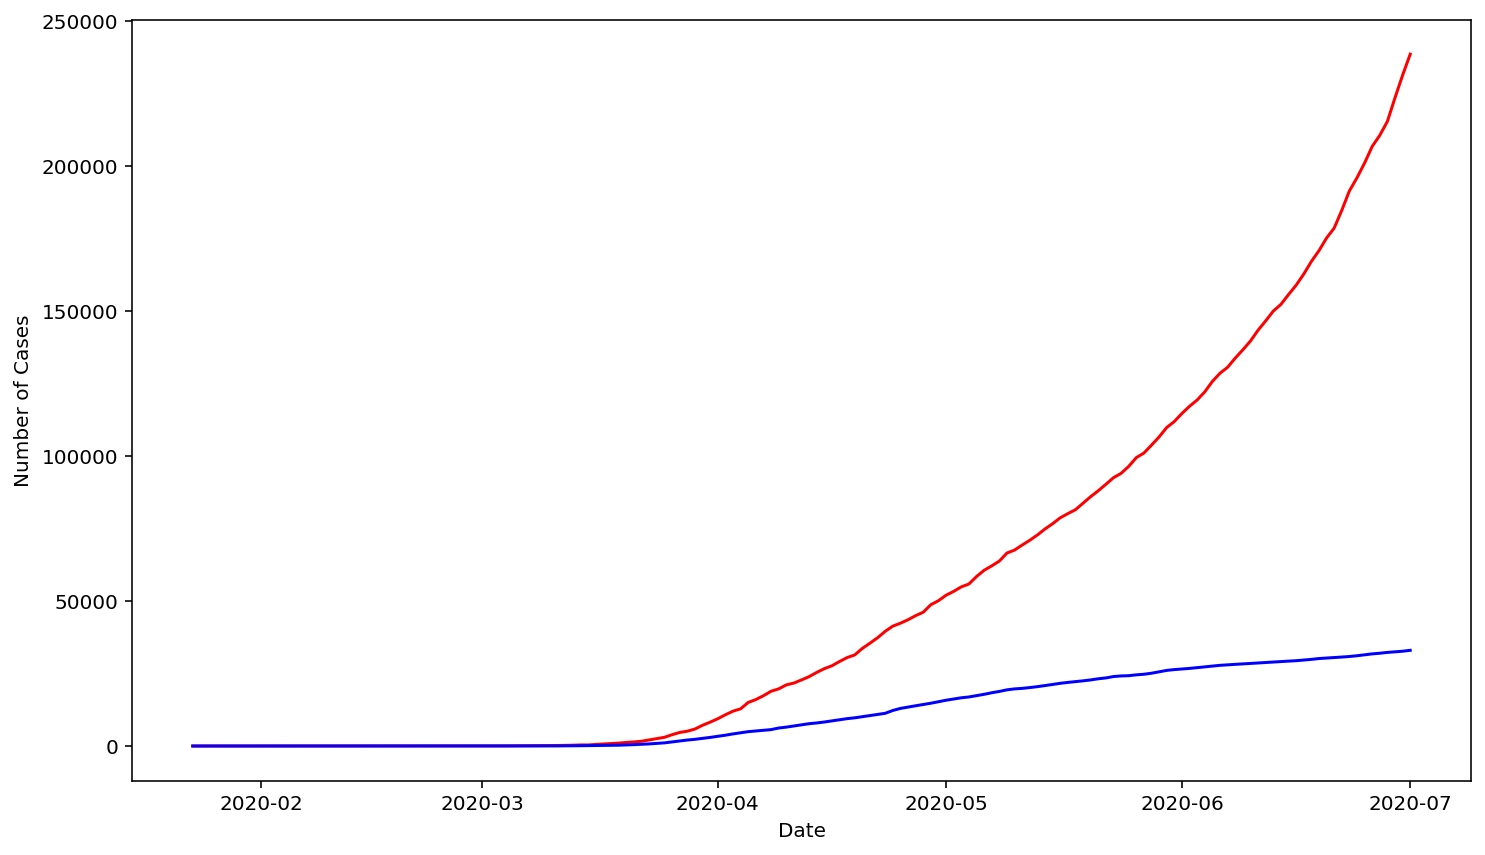

In [27]:
# create a line graph
plt.plot(ca_sum['Date'], ca_sum['Confirmed'], color='red')
plt.plot(co_sum['Date'], co_sum['Confirmed'], color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

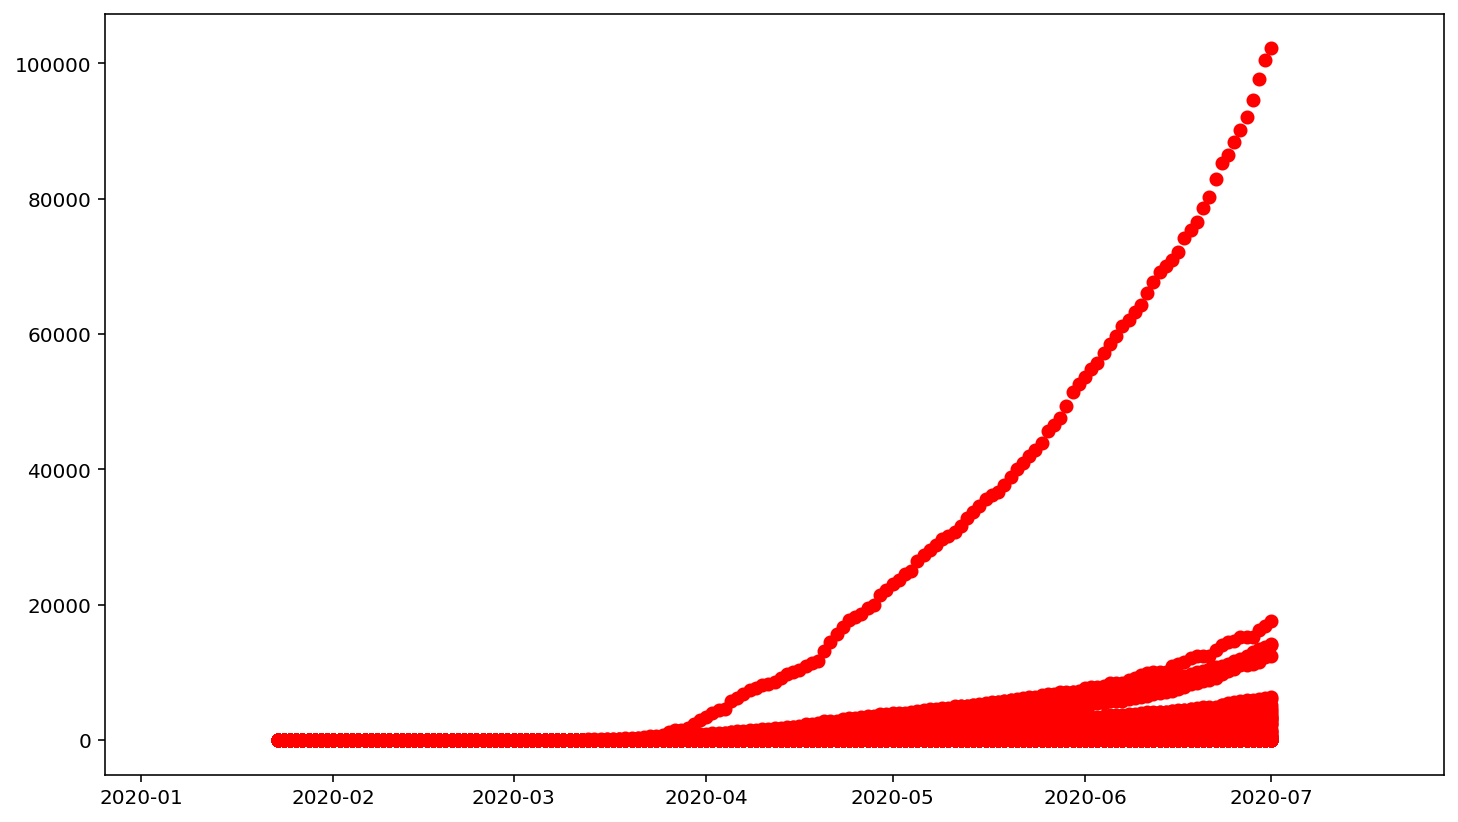

In [32]:
# create a scatterplot
plt.scatter(ca_df['Date'], ca_df['Active'], color='red')
plt.show()

In [42]:
ca_cities = ca_df.groupby(['City']).Confirmed.sum().reset_index()
ca_cities.describe()

,Confirmed
count,6.000000e+01
mean,1.417238e+05
std,5.182828e+05
min,0.000000e+00
25%,1.629500e+03
50%,1.106900e+04
75%,1.178512e+05
max,3.953328e+06


In [43]:
ca_top_cities = ca_cities[ca_cities.Confirmed > 2e+05]

<BarContainer object of 7 artists>

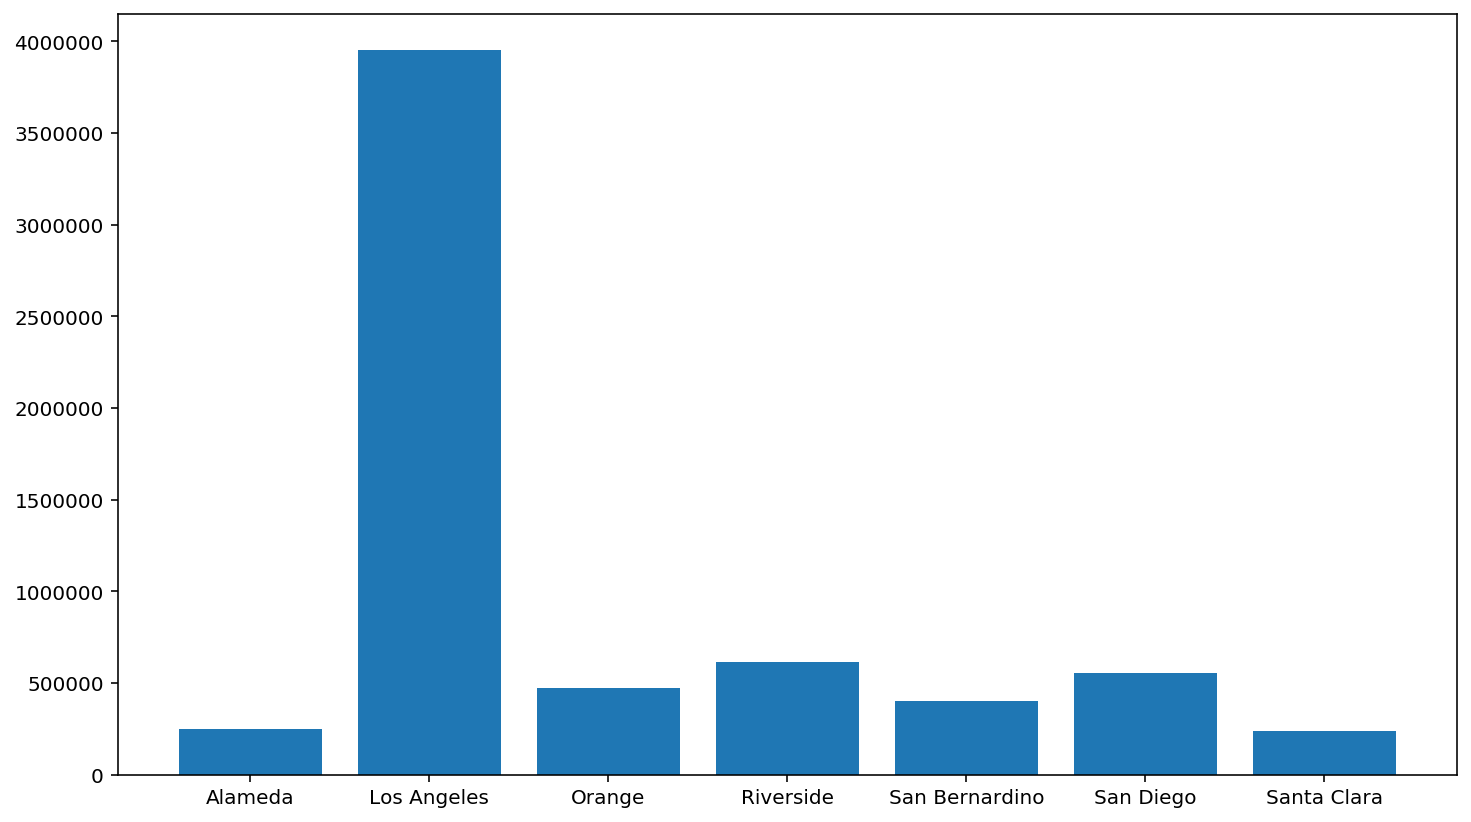

In [45]:
# bar graph
plt.bar(ca_top_cities.City, ca_top_cities.Confirmed)

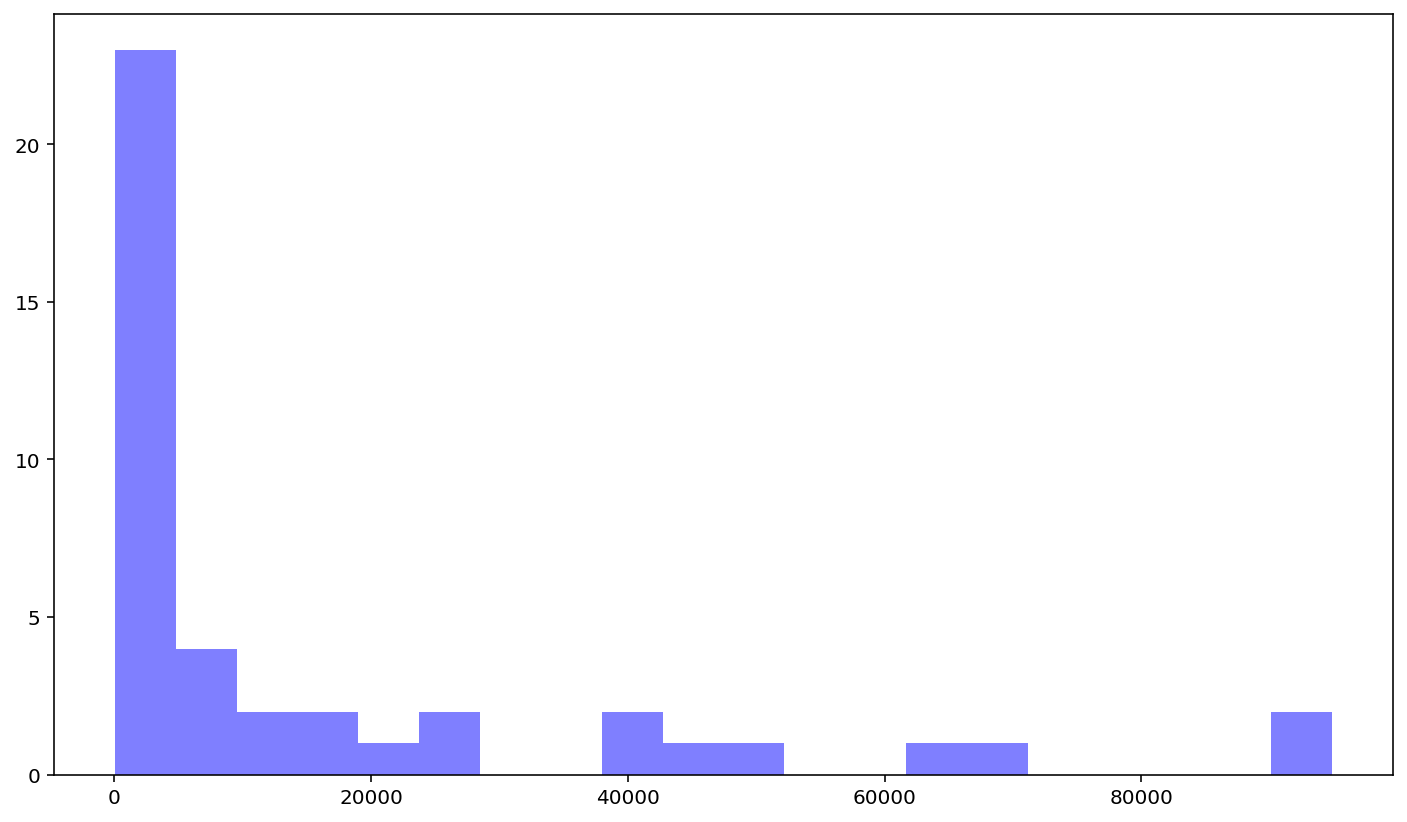

In [55]:
# histogram
ca_cities = ca_cities[ca_cities.Confirmed < 10**5]
ca_cases = ca_cities.Confirmed
num_bins = 20
plt.hist(ca_cases, num_bins, facecolor='blue', alpha = 0.5)
plt.show()